<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/otto_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **otto analysis**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 데이터 불러오기
df = pd.read_csv('otto_data.csv')  # 경로는 환경에 맞게 조정

# 2. feature, target 분리 및 라벨 인코딩
X = df.drop(columns=['id', 'target'])
y = df['target']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. 학습/테스트 데이터 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. 랜덤 포레스트 모델 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8091
Confusion Matrix:
[[ 173   12    1    0    1   36   14   83   79]
 [   1 2814  318   18    4    2   11    6    4]
 [   0  775  740   19    0    2   15    7    3]
 [   0  212   78  222    4   17    5    0    0]
 [   0    8    1    0  553    0    2    0    1]
 [   9   23    3    3    0 2728   30   54   34]
 [   3   76   34    7    6   43  313   63    7]
 [  10   19    6    0    0   45    6 1569   19]
 [  15   17    0    0    3   43    6   40  901]]


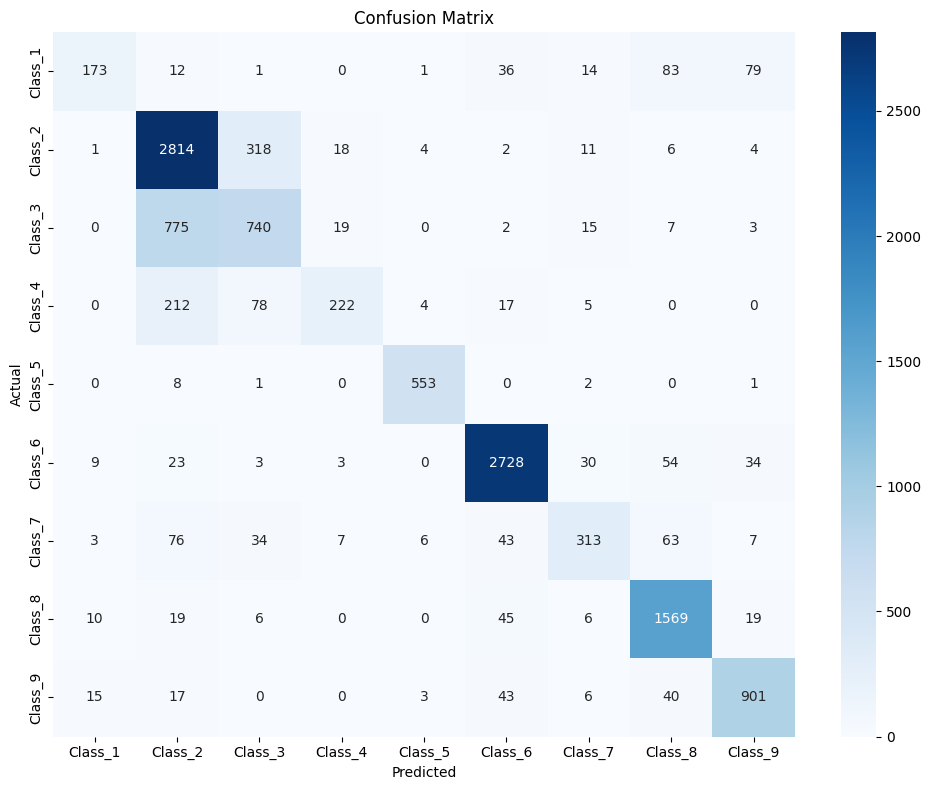

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion matrix 시각화 함수
def plot_confusion_matrix(y_true, y_pred, labels):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 함수 호출
plot_confusion_matrix(y_test, y_pred, le.classes_)


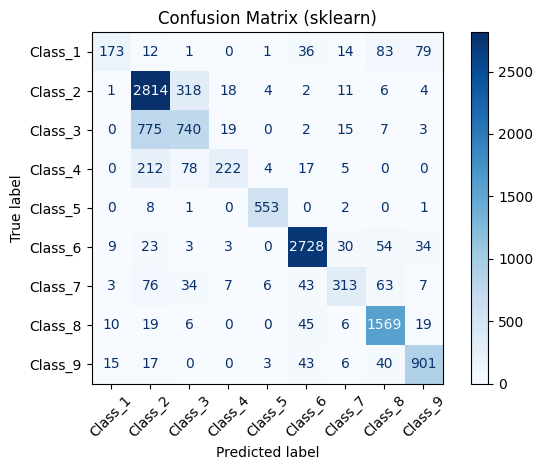

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ConfusionMatrixDisplay 사용
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (sklearn)')
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 최적 모델 평가
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Test Accuracy (GridSearchCV):", accuracy_grid)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy (GridSearchCV): 0.81060116354234


In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 랜덤 탐색용 하이퍼파라미터 분포
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# 최적 모델 평가
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Test Accuracy (RandomizedSearchCV):", accuracy_random)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters (RandomizedSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 266}
Test Accuracy (RandomizedSearchCV): 0.812136393018746


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 데이터 불러오기
df = pd.read_csv("otto_data.csv")
X = df.drop(columns=["id", "target"])
y = LabelEncoder().fit_transform(df["target"])

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 1단계: Coarse Grid Search
# -------------------------------
coarse_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

coarse_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=coarse_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)
coarse_grid.fit(X_train, y_train)
best_coarse = coarse_grid.best_params_

# -------------------------------
# 2단계: Fine Grid Search
# -------------------------------
# max_depth이 None인 경우 예외처리
md = best_coarse["max_depth"]
fine_param_grid = {
    'n_estimators': [best_coarse['n_estimators'] - 25,
                     best_coarse['n_estimators'],
                     best_coarse['n_estimators'] + 25],
    'max_depth': [md] if md is None else [md - 2, md, md + 2],
    'min_samples_split': [max(2, best_coarse['min_samples_split'] - 1),
                          best_coarse['min_samples_split'],
                          best_coarse['min_samples_split'] + 1],
    'min_samples_leaf': [max(1, best_coarse['min_samples_leaf'] - 1),
                         best_coarse['min_samples_leaf'],
                         best_coarse['min_samples_leaf'] + 1]
}

fine_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=fine_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)
fine_grid.fit(X_train, y_train)
best_fine_model = fine_grid.best_estimator_
best_fine_params = fine_grid.best_params_

# -------------------------------
# 테스트 정확도 평가
# -------------------------------
y_pred = best_fine_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print("Best Coarse Parameters:", best_coarse)
print("Best Fine Parameters:", best_fine_params)
print("Test Accuracy:", f"{test_accuracy:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Coarse Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Fine Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 225}
Test Accuracy: 0.8124
